In [1]:
"""
clone and install PySDM dependencies in Colab
"""
import os, sys
if 'google.colab' in sys.modules:
    %cd /content
    if not os.path.isdir('PySDM'):
        !git clone --depth 1 https://github.com/atmos-cloud-sim-uj/PySDM.git
        %cd PySDM
    else:
        %cd PySDM
        !git pull
    !pip install -r requirements.txt
    !ldconfig

In [2]:
import os, sys
if 'google.colab' in sys.modules:
    %cd /content/PySDM
else:
    sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [17]:
from PySDM_examples.Arabas_et_al_2015_Figs_8_9.settings import Settings
from PySDM_examples.Arabas_et_al_2015_Figs_8_9.simulation import Simulation
from PySDM_examples.Arabas_et_al_2015_Figs_8_9.storage import Storage
from PySDM_examples.Arabas_et_al_2015_Figs_8_9.netcdf_exporter import NetCDFExporter
from PySDM_examples.Arabas_et_al_2015_Figs_8_9.demo_plots import _TimeseriesPlot, _ImagePlot
from PySDM_examples.utils.temporary_file import TemporaryFile
from PySDM_examples.utils.show_plot import show_plot
from PySDM_examples.utils.widgets import display, HTML, FloatProgress
import PySDM.products as PySDM_products
from PySDM.physics import si
import matplotlib
import numpy as np
import string
from scipy.io.netcdf import netcdf_file
from matplotlib import pyplot, rcParams
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
from scipy.ndimage.filters import uniform_filter1d

In [4]:
class ProgBarController:
    def __init__(self, description):
        self.progress = FloatProgress(value=0.0, min=0.0, max=1.0, description=description)
        self.panic = False
        
    def __enter__(self):
        self.set_percent(0)
        display(self.progress)
        
    def __exit__(self, *_):
        pass

    def set_percent(self, value):
        self.progress.value = value

In [5]:
def label(settings):
    lbl = str({k.replace('condensation_', ''):
               "{:.1e}".format(v) if type(v) is float else 
               str(v).zfill(2) if type(v) is int else
               v for k,v in settings.items()})
    return lbl\
        .replace('{','')\
        .replace('}','')\
        .replace("'",'')\
        .replace('True', 'T')\
        .replace('False', 'F')\
        .replace('_thd','$_{th}$')\
        .replace('e-0','e-')

In [6]:
m = 7
runs = (
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': True, 'condensation_rtol_thd': 2e-5/m/m}},
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': True, 'condensation_rtol_thd': 2e-5/m}},
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': True, 'condensation_rtol_thd': 2e-5}},
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': True, 'condensation_rtol_thd': 2e-5*m}},
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': False, 'condensation_substeps':  32}},
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': False, 'condensation_substeps':  16}},
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': False, 'condensation_substeps':   8}},
    {'file': TemporaryFile('.nc'), 'settings': {'condensation_adaptive': False, 'condensation_substeps':   4}},
)

In [7]:
radius_range = (.5*si.um, 25*si.um)
dt = 32 * si.s

for i, run in enumerate(runs):
    settings = Settings()

    products = (
        PySDM_products.PeakSupersaturation(),
        PySDM_products.CondensationWallTime(),
        PySDM_products.AerosolSpecificConcentration(radius_threshold=radius_range[0]),
        PySDM_products.CloudDropletEffectiveRadius(radius_range=radius_range)
    )

    settings.n_sd_per_gridbox = 128 if 'CI' not in os.environ else 32
    settings.grid = (32, 32)
    settings.dt = dt
    settings.condensation_dt_cond_range = (.25*si.s, settings.dt)
    
    settings.mode_1.norm_factor *= 3
    settings.mode_2.norm_factor *= 3
    settings.spectrum_per_mass_of_dry_air.norm_factor *= 3
    settings.simulation_time = settings.spin_up_time * (1 if 'CI' not in os.environ else .1)
    settings.output_interval = settings.dt
    settings.condensation_rtol_x = 1e-6
    settings.condensation_rtol_thd = -1
    settings.condensation_schedule = 'dynamic'
    settings.kappa = .8
    
    for key, value in run['settings'].items():        
        assert hasattr(settings, key)
        setattr(settings, key, value)
    
    storage = Storage()
    simulation = Simulation(settings, storage)
    simulation.reinit(products)

    simulation.run(ProgBarController(f"run {i+1}/{len(runs)}"))
    exporter = NetCDFExporter(storage, settings, simulation, run['file'].absolute_path)
    exporter.run(ProgBarController('netCDF'))

FloatProgress(value=0.0, description='run 1/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

FloatProgress(value=0.0, description='run 2/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

FloatProgress(value=0.0, description='run 3/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

FloatProgress(value=0.0, description='run 4/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

FloatProgress(value=0.0, description='run 5/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

FloatProgress(value=0.0, description='run 6/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

FloatProgress(value=0.0, description='run 7/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

FloatProgress(value=0.0, description='run 8/8', max=1.0)

FloatProgress(value=0.0, description='netCDF', max=1.0)

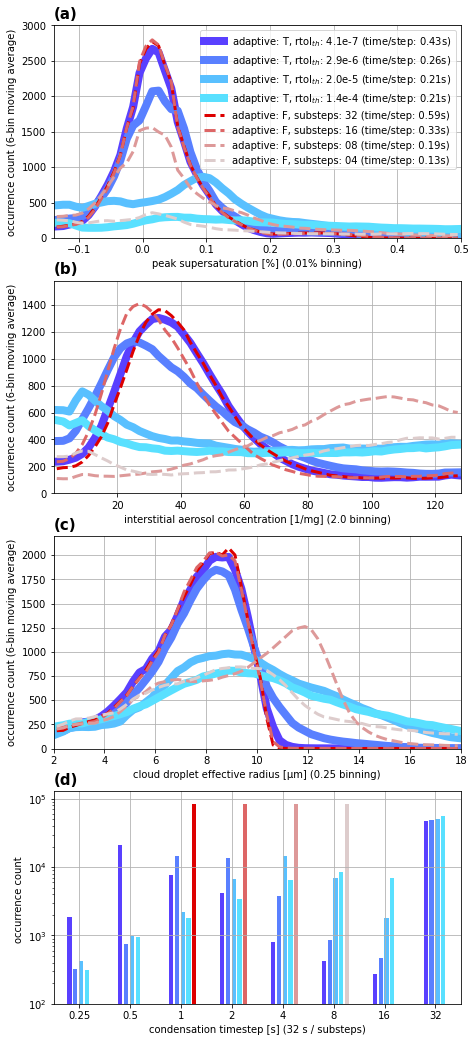

HTML(value="<a href='../utils/temporary_files/tmpcn1yn1hk.pdf' target='_blank'>../utils/temporary_files/tmpcn1…

In [43]:
matplotlib.rcParams["figure.figsize"] = (7.3, 18)

colors = (
    '#5940ff', '#5980ff', '#59c0ff', '#59e0ff',
    '#dd0000', '#dd6666', '#dd9999', '#ddcccc'
)
skip_steps = 30
bins = 64
bin_range = {
    'S_max': (-.14, .5),
    'n_a_mg': (0.05, 128.05),
    'r_eff': (2, 18),
    'dt_cond_min': (-2.5, 5.5)
}
window = 6

fig, axs = pyplot.subplots(len(bin_range),1)
for plot_i, var in enumerate(bin_range.keys()):
    ax = axs[plot_i]
    for i, run in enumerate(runs):
        nc = netcdf_file(run['file'].absolute_path, mode='r', mmap=False)
        n_spinup = nc.n_spin_up // nc.steps_per_output_interval
        assert skip_steps >= n_spinup // 4
        data = nc.variables[var]
        if var == 'dt_cond_min':
            data = np.log2(data[:])
        timesteps = slice(skip_steps, -1)
        wall_time = np.mean(nc.variables['cond_wall_time'][timesteps])
        wall_time_ratio = int(100 * wall_time) / 100
        y, x, _ = ax.hist(data[timesteps, :, :].flatten(), 
                              bins=bins, range=bin_range[var], histtype='step', 
                              color=colors[i], lw=0)
        if var != 'dt_cond_min':
            ax.plot((x[1:] + x[:-1])/2, uniform_filter1d(y, size=window), color=colors[i], 
                        lw=8 if run['settings']['condensation_adaptive'] else 3,
                        ls='--' if not run['settings']['condensation_adaptive'] else '-',
                        label=f"{label(run['settings'])} (time/step: {wall_time_ratio:.2f}s)"
                   )
        else:
            dx = x[1] - x[0]
            ax.bar(x[0:-1] - dx/.66 + dx/1.1*min(4,i), y, color=colors[i], width=dx/1.5)
        ax.set_ylabel(f'occurrence count ' + (f'({window}-bin moving average)' if var != 'dt_cond_min' else ''))
        binwidth = (bin_range[var][1]-bin_range[var][0])/bins
        if var == 'S_max':
            ax.set_ylim(0, 3000)
            ax.set_xlabel(f'peak supersaturation [%] ({binwidth}% binning)')
        elif var == 'n_a_mg':
            ax.set_xlabel(f'interstitial aerosol concentration [1/mg] ({binwidth} binning)')
        elif var == 'r_eff':
            ax.set_xlabel(f'cloud droplet effective radius [μm] ({binwidth} binning)')
            ax.set_ylim(0, 2200)
        elif var == 'dt_cond_min':
            ax.set_xlabel(f'condensation timestep [s] ({dt:.0f} s / substeps)')
            labels = {pw:2**pw for pw in range(-2, 6)}
            ax.set_xticks(tuple(labels.keys()))
            ax.set_xticklabels(tuple(labels.values()))
            ax.set_yscale('log')
            ax.set_ylim(1e2, 1.3e5)
        else:
            assert False
    ax.grid()
    if plot_i == 0:
        ax.legend()
    ax.set_xlim(bin_range[var])
    ax.text(0, 1.03, '('+string.ascii_lowercase[plot_i]+')', transform=ax.transAxes, size=15, weight='bold')
show_plot()